In [1]:
import pandas as pd
import toad.transform


def fe_application(df):
    #上班天数比例
    df['DAYS_EMPLOYED_PERC'] = df['DAYS_EMPLOYED'] / df['DAYS_BIRTH']
    # 收入和授信比例
    df['INCOME_CREDIT_PERC'] = df['AMT_INCOME_TOTAL'] / df['AMT_CREDIT']
    # 家庭人均收入   收入/家庭人口
    df['INCOME_PER_PERSON'] = df['AMT_INCOME_TOTAL'] / df['CNT_FAM_MEMBERS']
    # 年金/收入 比例
    df['ANNUITY_INCOME_PERC'] = df['AMT_ANNUITY'] / df['AMT_INCOME_TOTAL']
    # 年金/授信比例
    df['PAYMENT_RATE'] = df['AMT_ANNUITY'] / df['AMT_CREDIT']
    ft_list = ['income_per_person', 'DAYS_EMPLOYED_PERC', 'INCOME_CREDIT_PERC', 'INCOME_PER_PERSON',
               'ANNUITY_INCOME_PERC', 'PAYMENT_RATE']
    return df, ft_list

In [2]:
import pandas as pd
application_train_ft = pd.read_csv(r'I:\PYTHON\AI_datamining\data\processed\application_train_cleaned.csv')
application_train_ft, new_application_fts = fe_application(application_train_ft)
df_ft = application_train_ft

In [3]:
bureau_balance_ft = pd.read_csv(r'I:\PYTHON\AI_datamining\data\processed\bureau_balance.csv')
bureau_ft = pd.read_csv(r'I:\PYTHON\AI_datamining\data\processed\bureau_cleaned.csv')
pos_cash_balance_ft = pd.read_csv(r'I:\PYTHON\AI_datamining\data\processed\pos_cash_balance_cleaned.csv')
credit_card_balance_ft = pd.read_csv(r'I:\PYTHON\AI_datamining\data\processed\credit_card_balance_cleaned.csv')
previous_application_ft = pd.read_csv(r'I:\PYTHON\AI_datamining\data\processed\previous_application_cleaned.csv')
installment_payments_ft = pd.read_csv(r'I:\PYTHON\AI_datamining\data\processed\installment_payments_cleaned.csv')

In [74]:
df_b = pd.DataFrame()
df_b['SK_ID_CURR'] = previous_application_ft['SK_ID_CURR'].unique()
df_b

,SK_ID_CURR
0,271877
1,108129
2,122040
3,176158
4,202054
...,...
338852,239799
338853,174832
338854,253940
338855,353284


In [75]:
previous_application_ft['SK_ID_CURR']

0          271877
1          108129
2          122040
3          176158
4          202054
            ...  
1670209    352015
1670210    334635
1670211    249544
1670212    400317
1670213    261212
Name: SK_ID_CURR, Length: 1670214, dtype: int64

In [69]:
lists =['Unused offer','Canceled']
pf = previous_application_ft[~previous_application_ft['NAME_CONTRACT_STATUS'].isin(lists)]
pf.groupby('SK_ID_CURR')['SK_ID_PREV'].count()

SK_ID_CURR
100001    1
100002    1
100003    3
100004    1
100005    1
         ..
456251    1
456252    1
456253    2
456254    2
456255    8
Name: SK_ID_PREV, Length: 338402, dtype: int64

In [130]:
def fe_previous_application_ft(df_a):
    df_b = pd.DataFrame()
    lists =['Unused offer','Canceled']
    df = df_a[~df_a['NAME_CONTRACT_STATUS'].isin(lists)]
    df_p = df_a[df_a['NAME_CONTRACT_STATUS']=='Approved']
    df_r = df_a[df_a['NAME_CONTRACT_STATUS']=='Refused']

    #历史申请次数
    df_b['Number_of_historical_applications'] = df.groupby('SK_ID_CURR')['SK_ID_PREV'].count()
    #历史申请总额度
    df_b['Total_historical_application'] = df.groupby('SK_ID_CURR')['AMT_APPLICATION'].sum()
    #历史发放总额度
    df_b['Total_historical'] = df.groupby('SK_ID_CURR')['AMT_CREDIT'].sum()
    #平均每次申请额度
    df_b['avg_application_amount']=df_b['Total_historical_application']/df_b['Number_of_historical_applications']
    #平均每次发放额度
    df_b['avg_amount']=df_b['Total_historical']/df_b['Number_of_historical_applications']
    #使用目的最多
    df_b['NAME_CASH_LOAN_PURPOSE_MAX'] = df.groupby('SK_ID_CURR')['NAME_CASH_LOAN_PURPOSE'].agg(lambda x:x.value_counts().index[0])
    #被拒绝原因最多
    df_b['CODE_REJECT_REASON_MAX'] = df.groupby('SK_ID_CURR')['CODE_REJECT_REASON'].agg(lambda x:x.value_counts().index[0])
    #申请贷款类型最多
    df_b['NAME_PORTFOLIO_MAX'] = df.groupby('SK_ID_CURR')['NAME_PORTFOLIO'].agg(lambda x:x.value_counts().index[0])
    #授信期数最多
    df_b['CNT_PAYMENT_MAX'] =df.groupby('SK_ID_CURR')['CNT_PAYMENT'].max()
    #授信期数平均
    df_b['CNT_PAYMENT_AVG'] =df.groupby('SK_ID_CURR')['CNT_PAYMENT'].mean()
    #授信期数最小
    df_b['CNT_PAYMENT_MIN'] =df.groupby('SK_ID_CURR')['CNT_PAYMENT'].min()
    #授信期数总数
    df_b['CNT_PAYMENT_SUM'] =df.groupby('SK_ID_CURR')['CNT_PAYMENT'].sum()
    #申请记录利率水平最多
    df_b['NAME_YIELD_GROUP_MAX'] = df.groupby('SK_ID_CURR')['NAME_YIELD_GROUP'].agg(lambda x:x.value_counts().index[0])
    #申请记录的第一次付款时间相隔天数最多
    df_b['DAYS_FIRST_DRAWING_MAX'] =df.groupby('SK_ID_CURR')['DAYS_FIRST_DRAWING'].max()
    #申请记录的第一次付款时间相隔天数平均
    df_b['DAYS_FIRST_DRAWING_AVG'] =df.groupby('SK_ID_CURR')['DAYS_FIRST_DRAWING'].mean()
    #申请记录的第一次付款时间相隔天数最小
    df_b['DAYS_FIRST_DRAWING_MIN'] =df.groupby('SK_ID_CURR')['DAYS_FIRST_DRAWING'].min()
    #申请记录的第一次付款时间相隔天数总数
    df_b['DAYS_FIRST_DRAWING_SUM'] =df.groupby('SK_ID_CURR')['DAYS_FIRST_DRAWING'].sum()    
    
    #申请记录的首次到期时间相隔天数最多
    df_b['DAYS_FIRST_DUE_MAX'] =df.groupby('SK_ID_CURR')['DAYS_FIRST_DUE'].max()
    #平均
    df_b['DAYS_FIRST_DUE_AVG'] =df.groupby('SK_ID_CURR')['DAYS_FIRST_DUE'].mean()
    #最小
    df_b['DAYS_FIRST_DUE_MIN'] =df.groupby('SK_ID_CURR')['DAYS_FIRST_DUE'].min()
    #总数
    df_b['DAYS_FIRST_DUE_SUM'] =df.groupby('SK_ID_CURR')['DAYS_FIRST_DUE'].sum()
    
    #申请记录的首次逾期时间相隔天数最多
    df_b['DAYS_LAST_DUE_1ST_VERSION_MAX'] =df.groupby('SK_ID_CURR')['DAYS_LAST_DUE_1ST_VERSION'].max()
    #平均
    df_b['DAYS_LAST_DUE_1ST_VERSION_AVG'] =df.groupby('SK_ID_CURR')['DAYS_LAST_DUE_1ST_VERSION'].mean()
    #最小
    df_b['DAYS_LAST_DUE_1ST_VERSION_MIN'] =df.groupby('SK_ID_CURR')['DAYS_LAST_DUE_1ST_VERSION'].min()
    #总数
    df_b['DAYS_LAST_DUE_1ST_VERSION_SUM'] =df.groupby('SK_ID_CURR')['DAYS_LAST_DUE_1ST_VERSION'].sum()
    
    #申请记录的最后一次到期时间相隔天数最多
    df_b['DAYS_LAST_DUE_MAX'] =df.groupby('SK_ID_CURR')['DAYS_LAST_DUE'].max()
    #平均
    df_b['DAYS_LAST_DUE_AVG'] =df.groupby('SK_ID_CURR')['DAYS_LAST_DUE'].mean()
    #最小
    df_b['DAYS_LAST_DUE_MIN'] =df.groupby('SK_ID_CURR')['DAYS_LAST_DUE'].min()
    #总数
    df_b['DAYS_LAST_DUE_SUM'] =df.groupby('SK_ID_CURR')['DAYS_LAST_DUE'].sum()
    
    #预期终止时间相隔天数最多
    df_b['DAYS_TERMINATION_MAX'] =df.groupby('SK_ID_CURR')['DAYS_TERMINATION'].max()
    #平均
    df_b['DAYS_TERMINATION_AVG'] =df.groupby('SK_ID_CURR')['DAYS_TERMINATION'].mean()
    #最小
    df_b['DAYS_TERMINATION_MIN'] =df.groupby('SK_ID_CURR')['DAYS_TERMINATION'].min()
    #总数
    df_b['DAYS_TERMINATION_SUM'] =df.groupby('SK_ID_CURR')['DAYS_TERMINATION'].sum()
    
     #历史被拒次数
    df_b['Number_of_Refused'] = df_r.groupby('SK_ID_CURR')['SK_ID_PREV'].count()
    #历史被拒总金额
    df_b['R_Total_historical_application'] = df_r.groupby('SK_ID_CURR')['AMT_APPLICATION'].sum()
    #平均每次被拒额度
    df_b['R_avg_application_amount']=df_b['R_Total_historical_application']/df_b['Number_of_Refused']
    #最小被拒金额
    df_b['R_min_amount'] = df_r.groupby('SK_ID_CURR')['AMT_APPLICATION'].min()
    
 
    #历史通过次数
    df_b['Number_of_Approved'] = df_p.groupby('SK_ID_CURR')['SK_ID_PREV'].count()
    #历史通过最大金额
    df_b['P_max_amount'] = df_p.groupby('SK_ID_CURR')['AMT_APPLICATION'].max()
    #历史通过总金额
    df_b['P_Total_historical_application'] = df_p.groupby('SK_ID_CURR')['AMT_APPLICATION'].sum()   
    #平均每次通过额度
    df_b['P_avg_application_amount']=df_b['P_Total_historical_application']/df_b['Number_of_Approved']
    
    #历史实际通过最大金额
    df_b['P_max_AMT_CREDIT'] = df_p.groupby('SK_ID_CURR')['AMT_CREDIT'].max()
    #历史实际通过总金额
    df_b['P_Total_AMT_CREDIT_application'] = df_p.groupby('SK_ID_CURR')['AMT_CREDIT'].sum()
    #平均每次实际通过额度
    df_b['P_avg_application_AMT_CREDIT']=df_b['P_Total_AMT_CREDIT_application']/df_b['Number_of_Approved']
    
    
    #申请额度与实际额度差值
    df_b['Difference_total'] = df_b['P_Total_AMT_CREDIT_application'] -df_b['P_Total_historical_application']
      
    ##最大申请额度与最大实际额度差值
    df_b['Difference_max'] = df_b['P_max_AMT_CREDIT']-df_b['P_max_amount']
    
    #历史通过率
    df_b['Pass_rate'] = (df_b['Number_of_Refused']+df_b['Number_of_Approved'])/df_b['Number_of_Approved']
    
    #距今90天内 DAYS_DECISION 距今时间
    df = df_a[~df_a['NAME_CONTRACT_STATUS'].isin(lists)]
    df = df[df['DAYS_DECISION']>=-90]

    df_p = df_a[df_a['NAME_CONTRACT_STATUS']=='Approved']
    df_p = df_p[df_p['DAYS_DECISION']>=-90]
    df_r = df_a[df_a['NAME_CONTRACT_STATUS']=='Refused']
    df_r = df_r[df_r['DAYS_DECISION']>=-90]
    
    #历史被拒次数
    df_b['90D_Number_of_Refused'] = df_r.groupby('SK_ID_CURR')['SK_ID_PREV'].count()
    #历史被拒总金额
    df_b['90D_R_Total_historical_application'] = df_r.groupby('SK_ID_CURR')['AMT_APPLICATION'].sum()
    #平均每次被拒额度
    df_b['90D_R_avg_application_amount']=df_b['R_Total_historical_application']/df_b['Number_of_Refused']
    #最小被拒金额
    df_b['90D_R_min_amount'] = df_r.groupby('SK_ID_CURR')['AMT_APPLICATION'].min()
    
 
    #历史通过次数
    df_b['90D_Number_of_Approved'] = df_p.groupby('SK_ID_CURR')['SK_ID_PREV'].count()
    #历史通过最大金额
    df_b['90D_P_max_amount'] = df_p.groupby('SK_ID_CURR')['AMT_APPLICATION'].max()
    #历史通过总金额
    df_b['90D_P_Total_historical_application'] = df_p.groupby('SK_ID_CURR')['AMT_APPLICATION'].sum()
    #平均每次通过额度
    df_b['90D_P_avg_application_amount']=df_b['P_Total_historical_application']/df_b['Number_of_Approved']
    
    #历史实际通过最大金额
    df_b['90D_P_max_AMT_CREDIT'] = df_p.groupby('SK_ID_CURR')['AMT_CREDIT'].max()
    #历史实际通过总金额
    df_b['90D_P_Total_AMT_CREDIT_application'] = df_p.groupby('SK_ID_CURR')['AMT_CREDIT'].sum()
    #平均每次实际通过额度
    df_b['90D_P_avg_application_AMT_CREDIT']=df_b['P_Total_AMT_CREDIT_application']/df_b['Number_of_Approved']
    
    
    #申请额度与实际额度差值
    df_b['90D_Difference_total'] = df_b['P_Total_AMT_CREDIT_application'] -df_b['P_Total_historical_application']
      
    ##最大申请额度与最大实际额度差值
    df_b['90D_Difference_max'] = df_b['P_max_AMT_CREDIT']-df_b['P_max_amount']

    #历史申请次数
    df_b['90D_Number_of_historical_applications'] = df.groupby('SK_ID_CURR')['SK_ID_PREV'].count()
    #历史申请总额度
    df_b['90D_Total_historical_application'] = df.groupby('SK_ID_CURR')['AMT_APPLICATION'].sum()
    #历史发放总额度
    df_b['90D_Total_historical'] = df.groupby('SK_ID_CURR')['AMT_CREDIT'].sum()
    #平均每次申请额度
    df_b['90D_avg_application_amount']=df_b['Total_historical_application']/df_b['Number_of_historical_applications']
    #平均每次发放额度
    df_b['90D_avg_amount']=df_b['Total_historical']/df_b['Number_of_historical_applications']
    #使用目的最多
    df_b['90D_NAME_CASH_LOAN_PURPOSE_MAX'] = df.groupby('SK_ID_CURR')['NAME_CASH_LOAN_PURPOSE'].agg(lambda x:x.value_counts().index[0])
    #被拒绝原因最多
    df_b['90D_CODE_REJECT_REASON_MAX'] = df.groupby('SK_ID_CURR')['CODE_REJECT_REASON'].agg(lambda x:x.value_counts().index[0])
    #申请贷款类型最多
    df_b['90D_NAME_PORTFOLIO_MAX'] = df.groupby('SK_ID_CURR')['NAME_PORTFOLIO'].agg(lambda x:x.value_counts().index[0])
    #授信期数最多
    df_b['90D_CNT_PAYMENT_MAX'] =df.groupby('SK_ID_CURR')['CNT_PAYMENT'].max()
    #授信期数平均
    df_b['90D_CNT_PAYMENT_AVG'] =df.groupby('SK_ID_CURR')['CNT_PAYMENT'].mean()
    #授信期数最小
    df_b['90D_CNT_PAYMENT_MIN'] =df.groupby('SK_ID_CURR')['CNT_PAYMENT'].min()
    #授信期数总数
    df_b['90D_CNT_PAYMENT_SUM'] =df.groupby('SK_ID_CURR')['CNT_PAYMENT'].sum()
    #申请记录利率水平最多
    df_b['90D_NAME_YIELD_GROUP_MAX'] = df.groupby('SK_ID_CURR')['NAME_YIELD_GROUP'].agg(lambda x:x.value_counts().index[0])


    #距今280天内
    df = df_a[~df_a['NAME_CONTRACT_STATUS'].isin(lists)]
    df = df[df['DAYS_DECISION']>=-280]
    
    df_p = df_a[df_a['NAME_CONTRACT_STATUS']=='Approved']
    df_p = df_p[df_p['DAYS_DECISION']>=-280]
    df_r = df_a[df_a['NAME_CONTRACT_STATUS']=='Refused']
    df_r = df_r[df_r['DAYS_DECISION']>=-280]
    
    #历史被拒次数
    df_b['280D_Number_of_Refused'] = df_r.groupby('SK_ID_CURR')['SK_ID_PREV'].count()
    #历史被拒总金额
    df_b['280D_R_Total_historical_application'] = df_r.groupby('SK_ID_CURR')['AMT_APPLICATION'].sum()
    #平均每次被拒额度
    df_b['280D_R_avg_application_amount']=df_b['R_Total_historical_application']/df_b['Number_of_Refused']
    #最小被拒金额
    df_b['280D_R_min_amount'] = df_r.groupby('SK_ID_CURR')['AMT_APPLICATION'].min()
    
 
    #历史通过次数
    df_b['280D_Number_of_Approved'] = df_p.groupby('SK_ID_CURR')['SK_ID_PREV'].count()
    #历史通过最大金额
    df_b['280D_P_max_amount'] = df_p.groupby('SK_ID_CURR')['AMT_APPLICATION'].max()
    #历史通过总金额
    df_b['280D_P_Total_historical_application'] = df_p.groupby('SK_ID_CURR')['AMT_APPLICATION'].sum()
    #平均每次通过额度
    df_b['280D_P_avg_application_amount']=df_b['P_Total_historical_application']/df_b['Number_of_Approved']
    
    #历史实际通过最大金额
    df_b['280D_P_max_AMT_CREDIT'] = df_p.groupby('SK_ID_CURR')['AMT_CREDIT'].max()
    #历史实际通过总金额
    df_b['280D_P_Total_AMT_CREDIT_application'] = df_p.groupby('SK_ID_CURR')['AMT_CREDIT'].sum()
    #平均每次实际通过额度
    df_b['280D_P_avg_application_AMT_CREDIT']=df_b['P_Total_AMT_CREDIT_application']/df_b['Number_of_Approved']
    
    
    #申请额度与实际额度差值
    df_b['280D_Difference_total'] = df_b['P_Total_AMT_CREDIT_application'] -df_b['P_Total_historical_application']
      
    ##最大申请额度与最大实际额度差值
    df_b['280D_Difference_max'] = df_b['P_max_AMT_CREDIT']-df_b['P_max_amount']

    #历史申请次数
    df_b['280D_Number_of_historical_applications'] = df.groupby('SK_ID_CURR')['SK_ID_PREV'].count()
    #历史申请总额度
    df_b['280D_Total_historical_application'] = df.groupby('SK_ID_CURR')['AMT_APPLICATION'].sum()
    #历史发放总额度
    df_b['280D_Total_historical'] = df.groupby('SK_ID_CURR')['AMT_CREDIT'].sum()
    #平均每次申请额度
    df_b['280D_avg_application_amount']=df_b['Total_historical_application']/df_b['Number_of_historical_applications']
    #平均每次发放额度
    df_b['280D_avg_amount']=df_b['Total_historical']/df_b['Number_of_historical_applications']
    #使用目的最多
    df_b['280D_NAME_CASH_LOAN_PURPOSE_MAX'] = df.groupby('SK_ID_CURR')['NAME_CASH_LOAN_PURPOSE'].agg(lambda x:x.value_counts().index[0])
    #被拒绝原因最多
    df_b['280D_CODE_REJECT_REASON_MAX'] = df.groupby('SK_ID_CURR')['CODE_REJECT_REASON'].agg(lambda x:x.value_counts().index[0])
    #申请贷款类型最多
    df_b['280D_NAME_PORTFOLIO_MAX'] = df.groupby('SK_ID_CURR')['NAME_PORTFOLIO'].agg(lambda x:x.value_counts().index[0])
    #授信期数最多
    df_b['280D_CNT_PAYMENT_MAX'] =df.groupby('SK_ID_CURR')['CNT_PAYMENT'].max()
    #授信期数平均
    df_b['280D_CNT_PAYMENT_AVG'] =df.groupby('SK_ID_CURR')['CNT_PAYMENT'].mean()
    #授信期数最小
    df_b['280D_CNT_PAYMENT_MIN'] =df.groupby('SK_ID_CURR')['CNT_PAYMENT'].min()
    #授信期数总数
    df_b['280D_CNT_PAYMENT_SUM'] =df.groupby('SK_ID_CURR')['CNT_PAYMENT'].sum()
    #申请记录利率水平最多
    df_b['280D_NAME_YIELD_GROUP_MAX'] = df.groupby('SK_ID_CURR')['NAME_YIELD_GROUP'].agg(lambda x:x.value_counts().index[0])
    
    #距今581天内
    df = df_a[~df_a['NAME_CONTRACT_STATUS'].isin(lists)]
    df = df[df['DAYS_DECISION']>=-581]

    df_p = df_a[df_a['NAME_CONTRACT_STATUS']=='Approved']
    df_p = df_p[df_p['DAYS_DECISION']>=-581]
    df_r = df_a[df_a['NAME_CONTRACT_STATUS']=='Refused']
    df_r = df_r[df_r['DAYS_DECISION']>=-581]
    
    #历史被拒次数
    df_b['581D_Number_of_Refused'] = df_r.groupby('SK_ID_CURR')['SK_ID_PREV'].count()
    #历史被拒总金额
    df_b['581D_R_Total_historical_application'] = df_r.groupby('SK_ID_CURR')['AMT_APPLICATION'].sum()
    #平均每次被拒额度
    df_b['581D_R_avg_application_amount']=df_b['R_Total_historical_application']/df_b['Number_of_Refused']
    #最小被拒金额
    df_b['581D_R_min_amount'] = df_r.groupby('SK_ID_CURR')['AMT_APPLICATION'].min()
    
 
    #历史通过次数
    df_b['581D_Number_of_Approved'] = df_p.groupby('SK_ID_CURR')['SK_ID_PREV'].count()
    #历史通过最大金额
    df_b['581D_P_max_amount'] = df_p.groupby('SK_ID_CURR')['AMT_APPLICATION'].max()
    #历史通过总金额
    df_b['581D_P_Total_historical_application'] = df_p.groupby('SK_ID_CURR')['AMT_APPLICATION'].sum()
    #平均每次通过额度
    df_b['581D_P_avg_application_amount']=df_b['P_Total_historical_application']/df_b['Number_of_Approved']
    
    #历史实际通过最大金额
    df_b['581D_P_max_AMT_CREDIT'] = df_p.groupby('SK_ID_CURR')['AMT_CREDIT'].max()
    #历史实际通过总金额
    df_b['581D_P_Total_AMT_CREDIT_application'] = df_p.groupby('SK_ID_CURR')['AMT_CREDIT'].sum()
    #平均每次实际通过额度
    df_b['581D_P_avg_application_AMT_CREDIT']=df_b['P_Total_AMT_CREDIT_application']/df_b['Number_of_Approved']
    
    
    #申请额度与实际额度差值
    df_b['581D_Difference_total'] = df_b['P_Total_AMT_CREDIT_application'] -df_b['P_Total_historical_application']
      
    ##最大申请额度与最大实际额度差值
    df_b['581D_Difference_max'] = df_b['P_max_AMT_CREDIT']-df_b['P_max_amount']

    #历史申请次数
    df_b['581D_Number_of_historical_applications'] = df.groupby('SK_ID_CURR')['SK_ID_PREV'].count()
    #历史申请总额度
    df_b['581D_Total_historical_application'] = df.groupby('SK_ID_CURR')['AMT_APPLICATION'].sum()
    #历史发放总额度
    df_b['581D_Total_historical'] = df.groupby('SK_ID_CURR')['AMT_CREDIT'].sum()
    #平均每次申请额度
    df_b['581D_avg_application_amount']=df_b['Total_historical_application']/df_b['Number_of_historical_applications']
    #平均每次发放额度
    df_b['581D_avg_amount']=df_b['Total_historical']/df_b['Number_of_historical_applications']
    #使用目的最多
    df_b['581D_NAME_CASH_LOAN_PURPOSE_MAX'] = df.groupby('SK_ID_CURR')['NAME_CASH_LOAN_PURPOSE'].agg(lambda x:x.value_counts().index[0])
    #被拒绝原因最多
    df_b['581D_CODE_REJECT_REASON_MAX'] = df.groupby('SK_ID_CURR')['CODE_REJECT_REASON'].agg(lambda x:x.value_counts().index[0])
    #申请贷款类型最多
    df_b['581D_NAME_PORTFOLIO_MAX'] = df.groupby('SK_ID_CURR')['NAME_PORTFOLIO'].agg(lambda x:x.value_counts().index[0])
    #授信期数最多
    df_b['581D_CNT_PAYMENT_MAX'] =df.groupby('SK_ID_CURR')['CNT_PAYMENT'].max()
    #授信期数平均
    df_b['581D_CNT_PAYMENT_AVG'] =df.groupby('SK_ID_CURR')['CNT_PAYMENT'].mean()
    #授信期数最小
    df_b['581D_CNT_PAYMENT_MIN'] =df.groupby('SK_ID_CURR')['CNT_PAYMENT'].min()
    #授信期数总数
    df_b['581D_CNT_PAYMENT_SUM'] =df.groupby('SK_ID_CURR')['CNT_PAYMENT'].sum()
    #申请记录利率水平最多
    df_b['581D_NAME_YIELD_GROUP_MAX'] = df.groupby('SK_ID_CURR')['NAME_YIELD_GROUP'].agg(lambda x:x.value_counts().index[0])
    
    #距今1300天内
    df = df_a[~df_a['NAME_CONTRACT_STATUS'].isin(lists)]
    df = df[df['DAYS_DECISION']>=-1300]

    df_p = df_a[df_a['NAME_CONTRACT_STATUS']=='Approved']
    df_p = df_p[df_p['DAYS_DECISION']>=-1300]
    df_r = df_a[df_a['NAME_CONTRACT_STATUS']=='Refused']
    df_r = df_r[df_r['DAYS_DECISION']>=-1300]
    
    #历史被拒次数
    df_b['1300D_Number_of_Refused'] = df_r.groupby('SK_ID_CURR')['SK_ID_PREV'].count()
    #历史被拒总金额
    df_b['1300D_R_Total_historical_application'] = df_r.groupby('SK_ID_CURR')['AMT_APPLICATION'].sum()
    #平均每次被拒额度
    df_b['1300D_R_avg_application_amount']=df_b['R_Total_historical_application']/df_b['Number_of_Refused']
    #最小被拒金额
    df_b['1300D_R_min_amount'] = df_r.groupby('SK_ID_CURR')['AMT_APPLICATION'].min()
    
 
    #历史通过次数
    df_b['1300D_Number_of_Approved'] = df_p.groupby('SK_ID_CURR')['SK_ID_PREV'].count()
    #历史通过最大金额
    df_b['1300D_P_max_amount'] = df_p.groupby('SK_ID_CURR')['AMT_APPLICATION'].max()
    #历史通过总金额
    df_b['1300D_P_Total_historical_application'] = df_p.groupby('SK_ID_CURR')['AMT_APPLICATION'].sum()
    #平均每次通过额度
    df_b['1300D_P_avg_application_amount']=df_b['P_Total_historical_application']/df_b['Number_of_Approved']
    
    #历史实际通过最大金额
    df_b['1300D_P_max_AMT_CREDIT'] = df_p.groupby('SK_ID_CURR')['AMT_CREDIT'].max()
    #历史实际通过总金额
    df_b['1300D_P_Total_AMT_CREDIT_application'] = df_p.groupby('SK_ID_CURR')['AMT_CREDIT'].sum()
    #平均每次实际通过额度
    df_b['1300D_P_avg_application_AMT_CREDIT']=df_b['P_Total_AMT_CREDIT_application']/df_b['Number_of_Approved']
    
    
    #申请额度与实际额度差值
    df_b['1300D_Difference_total'] = df_b['P_Total_AMT_CREDIT_application'] -df_b['P_Total_historical_application']
      
    ##最大申请额度与最大实际额度差值
    df_b['1300D_Difference_max'] = df_b['P_max_AMT_CREDIT']-df_b['P_max_amount']

    #历史申请次数
    df_b['1300D_Number_of_historical_applications'] = df.groupby('SK_ID_CURR')['SK_ID_PREV'].count()
    #历史申请总额度
    df_b['1300D_Total_historical_application'] = df.groupby('SK_ID_CURR')['AMT_APPLICATION'].sum()
    #历史发放总额度
    df_b['1300D_Total_historical'] = df.groupby('SK_ID_CURR')['AMT_CREDIT'].sum()
    #平均每次申请额度
    df_b['1300D_avg_application_amount']=df_b['Total_historical_application']/df_b['Number_of_historical_applications']
    #平均每次发放额度
    df_b['1300D_avg_amount']=df_b['Total_historical']/df_b['Number_of_historical_applications']
    #使用目的最多
    df_b['1300D_NAME_CASH_LOAN_PURPOSE_MAX'] = df.groupby('SK_ID_CURR')['NAME_CASH_LOAN_PURPOSE'].agg(lambda x:x.value_counts().index[0])
    #被拒绝原因最多
    df_b['1300D_CODE_REJECT_REASON_MAX'] = df.groupby('SK_ID_CURR')['CODE_REJECT_REASON'].agg(lambda x:x.value_counts().index[0])
    #申请贷款类型最多
    df_b['1300D_NAME_PORTFOLIO_MAX'] = df.groupby('SK_ID_CURR')['NAME_PORTFOLIO'].agg(lambda x:x.value_counts().index[0])
    #授信期数最多
    df_b['1300D_CNT_PAYMENT_MAX'] =df.groupby('SK_ID_CURR')['CNT_PAYMENT'].max()
    #授信期数平均
    df_b['1300D_CNT_PAYMENT_AVG'] =df.groupby('SK_ID_CURR')['CNT_PAYMENT'].mean()
    #授信期数最小
    df_b['1300D_CNT_PAYMENT_MIN'] =df.groupby('SK_ID_CURR')['CNT_PAYMENT'].min()
    #授信期数总数
    df_b['1300D_CNT_PAYMENT_SUM'] =df.groupby('SK_ID_CURR')['CNT_PAYMENT'].sum()
    #申请记录利率水平最多
    df_b['1300D_NAME_YIELD_GROUP_MAX'] = df.groupby('SK_ID_CURR')['NAME_YIELD_GROUP'].agg(lambda x:x.value_counts().index[0])
    df_b = df_b.reset_index()
    return df_b

In [131]:
previous_application_ft_de = fe_previous_application_ft(previous_application_ft)

C:\Users\melx99\AppData\Local\Temp\ipykernel_14996\2421835880.py:266: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_b['581D_R_Total_historical_application'] = df_r.groupby('SK_ID_CURR')['AMT_APPLICATION'].sum()
C:\Users\melx99\AppData\Local\Temp\ipykernel_14996\2421835880.py:268: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_b['581D_R_avg_application_amount']=df_b['R_Total_historical_application']/df_b['Number_of_Refused']
C:\Users\melx99\AppData\Local\Temp\ipykernel_14996\2421835880.py:270: PerformanceWarning: DataFrame i

In [134]:
sd=  toad.detect(previous_application_ft_de)
sd.sort_values('missing',ascending = False)

,type,size,missing,unique,mean_or_top1,std_or_top2,min_or_top3,1%_or_top4,10%_or_top5,50%_or_bottom5,75%_or_bottom4,90%_or_bottom3,99%_or_bottom2,max_or_bottom1
90D_R_min_amount,float64,338402,97.95%,851,443768.679846,443086.230793,0.0,0.0,0.0,315000.0,675000.0,1125000.0,1800000.0,3600000.0
90D_R_Total_historical_application,float64,338402,97.95%,1395,947386.932309,1346372.204386,0.0,0.0,45000.0,537844.5,1225113.75,2250000.0,6257430.0,19755000.0
90D_Number_of_Refused,float64,338402,97.95%,21,1.870162,1.583183,1.0,1.0,1.0,1.0,2.0,3.0,8.0,26.0
90D_Number_of_Approved,float64,338402,93.48%,5,1.100916,0.323864,1.0,1.0,1.0,1.0,1.0,1.0,2.0,5.0
90D_P_max_amount,float64,338402,93.48%,10435,196014.807484,256422.8624,0.0,16155.0,31911.3,99000.0,225000.0,472500.0,1309770.0,2475000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
280D_avg_amount,float64,338402,0.00%,231269,203078.650876,198842.098358,0.0,19660.527,45000.0,136543.875,261879.525,447281.25,940856.592857,4050000.0
DAYS_FIRST_DUE_MAX,float64,338402,0.00%,2891,-358.355388,560.664936,-2891.0,-2557.0,-1000.0,-105.0,-1.0,-1.0,-1.0,-1.0
DAYS_FIRST_DRAWING_SUM,float64,338402,0.00%,2897,-195.565936,566.158523,-3742.0,-2765.0,-549.0,-3.0,-2.0,-1.0,-1.0,-1.0
DAYS_FIRST_DRAWING_MIN,float64,338402,0.00%,2838,-192.47417,565.011626,-2922.0,-2759.0,-545.0,-1.0,-1.0,-1.0,-1.0,-1.0


In [140]:
previous_application_ft_de.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 338402 entries, 0 to 338401
Columns: 152 entries, SK_ID_CURR to 1300D_NAME_YIELD_GROUP_MAX
dtypes: float64(130), int64(2), object(20)
memory usage: 392.4+ MB


In [137]:
def count_list_na(table_name):
    count = 0 
    for column in table_name.columns:
        na_count = table_name[column][table_name[column].isna()].shape[0]
        if na_count>0:
            count+=1
    print('缺失列数量'+str(count))


In [138]:
count_list_na(previous_application_ft_de)

缺失列数量110


In [145]:
previous_application_ft_de.info(verbose=True,show_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 338402 entries, 0 to 338401
Data columns (total 152 columns):
 #    Column                                   Non-Null Count   Dtype  
---   ------                                   --------------   -----  
 0    SK_ID_CURR                               338402 non-null  int64  
 1    Number_of_historical_applications        338402 non-null  int64  
 2    Total_historical_application             338402 non-null  float64
 3    Total_historical                         338402 non-null  float64
 4    avg_application_amount                   338402 non-null  float64
 5    avg_amount                               338402 non-null  float64
 6    NAME_CASH_LOAN_PURPOSE_MAX               338402 non-null  object 
 7    CODE_REJECT_REASON_MAX                   338402 non-null  object 
 8    NAME_PORTFOLIO_MAX                       338402 non-null  object 
 9    CNT_PAYMENT_MAX                          338402 non-null  float64
 10   CNT_PAYMENT_AVG   

In [126]:
pp=pd.DataFrame()
previous_application_ft_p = previous_application_ft[previous_application_ft['NAME_CONTRACT_STATUS']=='Approved']

pp['max2']= previous_application_ft.groupby('SK_ID_CURR')['AMT_APPLICATION'].max()
pp['min2']= previous_application_ft.groupby('SK_ID_CURR')['AMT_APPLICATION'].min()
pp['max']= previous_application_ft_p.groupby('SK_ID_CURR')['AMT_APPLICATION'].max()
pp['min']= previous_application_ft_p.groupby('SK_ID_CURR')['AMT_APPLICATION'].min()
pp = pp.reset_index()
pp.head()


,SK_ID_CURR,max2,min2,max,min
0,100001,24835.5,24835.5,24835.5,24835.5
1,100002,179055.0,179055.0,179055.0,179055.0
2,100003,900000.0,68809.5,900000.0,68809.5
3,100004,24282.0,24282.0,24282.0,24282.0
4,100005,44617.5,0.0,44617.5,44617.5


In [99]:
pp[pp['SK_ID_CURR']==271877]

KeyError: 'SK_ID_CURR'

In [6]:
x=df_ft.drop(['TARGET'],axis=1)
y=df_ft['TARGET']

In [7]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=22)
x_train.head()

,SK_ID_CURR,CNT_CHILDREN,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_ID_PUBLISH,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,...,ORGANIZATION_TYPE,FONDKAPREMONT_MODE,HOUSETYPE_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE,DAYS_EMPLOYED_PERC,INCOME_CREDIT_PERC,INCOME_PER_PERSON,ANNUITY_INCOME_PERC,PAYMENT_RATE
111026,228804,0,-15143,-4129.0,-4900,1,1,0,1,0,...,Self-employed,-1,-1,-1,-1,0.272667,0.413551,112500.0,0.113300,0.046855
111731,229621,1,-12028,-866.0,-4094,1,1,0,1,0,...,Transport: type 2,reg oper account,block of flats,Panel,No,0.071999,0.186211,112500.0,0.157400,0.029310
71962,183452,0,-19007,-3401.0,-2542,1,1,0,1,0,...,Self-employed,-1,-1,-1,-1,0.178934,0.487031,78750.0,0.123086,0.059947
262442,403830,1,-10491,-3473.0,-3154,1,1,0,1,0,...,Trade: type 7,-1,block of flats,"Stone, brick",No,0.331046,0.666667,225000.0,0.075000,0.050000
285962,431192,0,-24047,-1.0,-4561,1,0,0,1,0,...,-1,reg oper account,block of flats,"Stone, brick",No,0.000042,0.655141,162000.0,0.107028,0.070118


In [46]:
df_ft['SK_ID_CURR'].value_counts().max()

1

In [17]:
import toad
c = toad.transform.Combiner()
c.fit(x_train,y_train,method='chi',min_samples=0.05)
transer = toad.transform.WOETransformer()



In [18]:
x_train_woe = transer.fit_transform(c.transform(x_train),y_train,exclude=['SK_ID_CURR'])
x_test_woe = transer.transform(c.transform(x_test))

In [19]:
y_train.info()

<class 'pandas.core.series.Series'>
Int64Index: 246008 entries, 111026 to 252036
Series name: TARGET
Non-Null Count   Dtype
--------------   -----
246008 non-null  int64
dtypes: int64(1)
memory usage: 3.8 MB


In [20]:
x_train_woe_stp,drop_list = toad.selection.select(x_train_woe,
target=y_train,
                                                  empty=0.5,
                                                  iv=0.05,
                                                  corr=0.7,
                                                  return_drop=True)
print('保留特征:',x_train_woe_stp.shape[1],'缺失删除:',len(drop_list['empty']),'低iv删除：',len(drop_list['iv']),'高相关删除：',len(drop_list['corr']))
x_train_woe_stp.shape

保留特征: 11 缺失删除: 0 低iv删除： 114 高相关删除： 1


(246008, 11)

In [22]:
x_test_woe_stp = x_test_woe[x_train_woe_stp.columns]


In [23]:
x_test_woe_stp.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 61503 entries, 83449 to 225618
Data columns (total 11 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   DAYS_BIRTH                   61503 non-null  float64
 1   DAYS_EMPLOYED                61503 non-null  float64
 2   REGION_RATING_CLIENT_W_CITY  61503 non-null  float64
 3   AMT_GOODS_PRICE              61503 non-null  float64
 4   EXT_SOURCE_1                 61503 non-null  float64
 5   EXT_SOURCE_2                 61503 non-null  float64
 6   EXT_SOURCE_3                 61503 non-null  float64
 7   NAME_INCOME_TYPE             61503 non-null  float64
 8   OCCUPATION_TYPE              61503 non-null  float64
 9   ORGANIZATION_TYPE            61503 non-null  float64
 10  PAYMENT_RATE                 61503 non-null  float64
dtypes: float64(11)
memory usage: 5.6 MB


In [32]:
def lgb_test(x_train,y_train,x_test,y_test):
    import lightgbm as lgb
    clf = lgb.LGBMClassifier(boosting_type='gbdt',
                             objective='binary',
                             metric = 'auc',
                             learning_rate=0.1,
                             n_estimators=24,
                             max_depth=4,
                             num_leaves=25,
                             max_bin = 40,
                             min_data_in_leaf=5,
                             bagging_fraction=0.6,
                             bagging_freq=0,
                             feature_fraction=0.8)
    clf.fit(x_train,y_train,eval_set=[(x_train,y_train),(x_test,y_test)],eval_metric = 'auc')
    return clf,clf.best_score_['valid_1']['auc']

In [35]:
lgb_model,lgb_auc = lgb_test(x_train_woe_stp,y_train,x_test_woe_stp,y_test)
sample = x_train_woe_stp.copy() 
sample['TARGET'] =y_train
sample['pred'] = lgb_model.predict_proba(x_train_woe_stp)[:,1]

sample = sample.sort_values(by=['pred'],ascending=False).reset_index()
sample['rank'] = sample.index.values/len(sample)
sample['pred'].min()

[LightGBM] [Warning] min_data_in_leaf is set=5, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=5
[LightGBM] [Warning] feature_fraction is set=0.8, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8
[LightGBM] [Warning] bagging_fraction is set=0.6, subsample=1.0 will be ignored. Current value: bagging_fraction=0.6
[LightGBM] [Warning] bagging_freq is set=0, subsample_freq=0 will be ignored. Current value: bagging_freq=0
[LightGBM] [Warning] min_data_in_leaf is set=5, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=5
[LightGBM] [Warning] feature_fraction is set=0.8, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8
[LightGBM] [Warning] bagging_fraction is set=0.6, subsample=1.0 will be ignored. Current value: bagging_fraction=0.6
[LightGBM] [Warning] bagging_freq is set=0, subsample_freq=0 will be ignored. Current value: bagging_freq=0
[LightGBM] [Info] Number of positive: 19988, number of negativ

0.018439804520722643

In [36]:
def weight(x,y):
    if x == 0 and y <0.1:
        return 0.1
    elif x == 1 and y >0.7:
        return 0.1
    else:
        return 1

sample['weight'] = sample.apply(lambda row:weight(row['TARGET'],row['rank']),axis = 1)
#把预测相对比较准的取出来进行过采样
smote_sample = sample[sample.weight == 1]
x_train_woe_stp_smote = smote_sample[x_train_woe_stp.columns]
y_train_smote = smote_sample['TARGET']
smote_sample.shape

(226010, 16)

In [37]:
def smote(train_x_smote,train_y_smote,K=15,random_state=0):
    from imblearn.over_sampling import SMOTE
    smote = SMOTE(k_neighbors=K, n_jobs=1,random_state=random_state)
    #fit_resample，找K个邻居，然后进行过采样
    rex,rey = smote.fit_resample(train_x_smote,train_y_smote)
    return rex,rey
rex,rey =smote(x_train_woe_stp_smote,y_train_smote)

#查看数据
rey.value_counts()

I:\PYTHON\Anaconda3\Lib\site-packages\imblearn\over_sampling\_smote\base.py:336: FutureWarning: The parameter `n_jobs` has been deprecated in 0.10 and will be removed in 0.12. You can pass an nearest neighbors estimator where `n_jobs` is already set instead.
  warnings.warn(


1    207712
0    207712
Name: TARGET, dtype: int64

In [24]:
from sklearn.metrics import roc_curve,roc_auc_score
from sklearn.linear_model import LogisticRegression
def lr_model(x,y,x_test,y_test,C=0.1):
    model = LogisticRegression(C=C,class_weight='balanced')
    model.fit(x,y)
    
    y_pred = model.predict_proba(x)[:,1]
    fpr,tpr,_=roc_curve(y,y_pred)
    x_ks = abs(fpr-tpr).max()
    print('x_ks:',x_ks)
    x_auc = roc_auc_score(y,y_pred)
    print('x_auc:',x_auc)
    
    y_pred = model.predict_proba(x_test)[:,1]
    fpr_test,tpr_test,_ = roc_curve(y_test,y_pred)
    x_test_ks = abs(fpr_test-tpr_test).max()
    print('x_test_ks:',x_test_ks)
    x_test_auc = roc_auc_score(y_test,y_pred)
    print('x_test_auc:',x_test_auc)
    
    from matplotlib import pyplot as plt
    plt.plot(fpr,tpr,label='x')
    plt.plot(fpr_test,tpr_test,label='x_test')
    plt.plot([0,1],[0,1],'k--')
    plt.xlabel('False positive rate')
    plt.ylabel('True positive rate')
    plt.title('ROC CURVE')
    plt.legend(loc='best')
    plt.show()



x_ks: 0.4864620243413958
x_auc: 0.8463138314270797
x_test_ks: 0.3553113977823665
x_test_auc: 0.7360321904381791


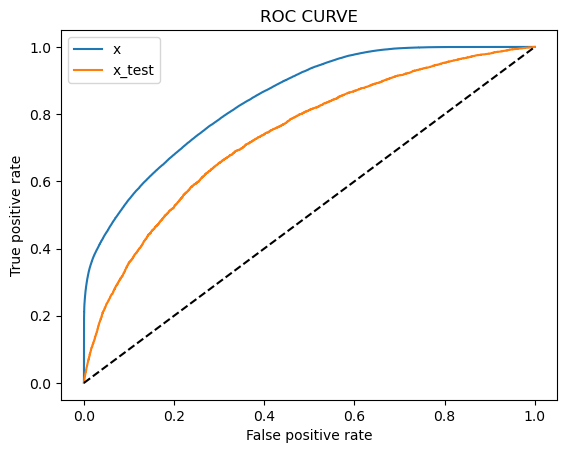

<function __main__.lr_model(x, y, x_test, y_test, C=0.1)>

In [38]:
lr_model(rex,rey,x_test_woe_stp,y_test,C=0.1)
lr_model

In [ ]:
# print('top 10 features with high iv')
# display(toad.quality(application_train.drop('SK_ID_CURR',axis=1),'TARGET',iv_only=True)[:10])
# print('last 10 features with low iv')
# display(toad.quality(application_train.drop('SK_ID_CURR',axis=1),'TARGET',iv_only=True)[-10:])